### Feature Scaling

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("./Data/Social_Network_Ads.csv")

In [25]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
373,15708791,Male,59,130000,1
256,15609637,Female,41,72000,0
74,15592877,Male,32,18000,0
71,15726358,Female,24,27000,0
300,15736397,Female,58,38000,1


In [26]:
df = df.drop(columns=["User ID", "Gender"])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("Purchased", axis=1),df["Purchased"], test_size=0.3)

In [28]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

## Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

# Transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# mean value for 2 columns
scaler.mean_

array([3.76571429e+01, 7.06000000e+04])

In [32]:
# now after scaling this returns numpy array

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [34]:
X_train_scaled.sample(5)

,Age,EstimatedSalary
58,-0.348859,0.041091
130,0.986616,1.978228
208,-0.635032,0.099792
97,1.940526,-1.397087
120,0.891225,-0.810076


## Data before scaling

In [33]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.7,70600.0
std,10.5,34131.9
min,18.0,15000.0
25%,29.8,44000.0
50%,37.0,71000.0
75%,46.0,88000.0
max,60.0,150000.0


## Data after scaling

In [35]:
np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.1,2.3


## Visualizing

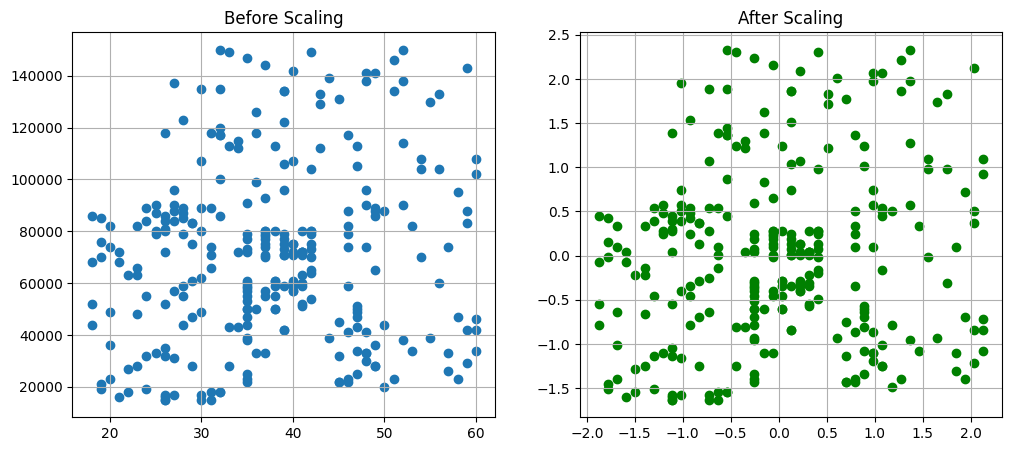

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax1.grid(True)

ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color="green")
ax2.set_title("After Scaling")
ax2.grid(True)

plt.show()

## Visualizing Density Function after and before scaling

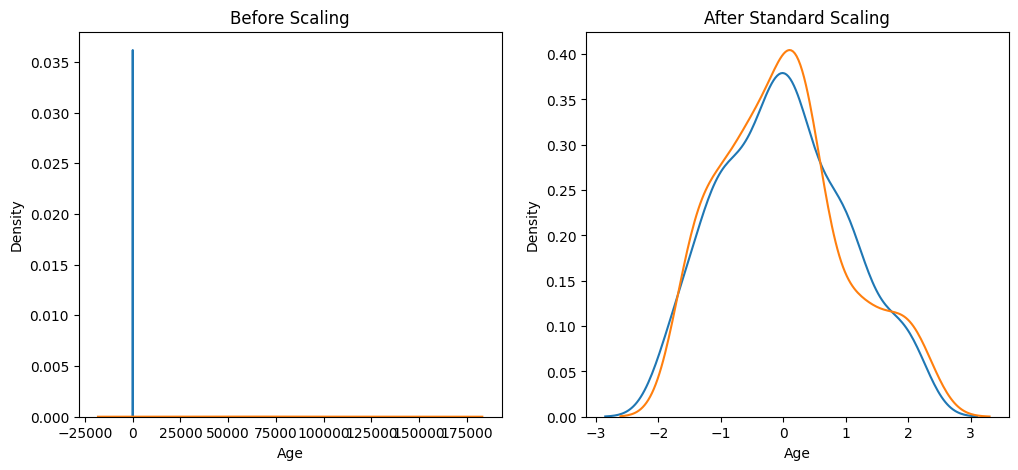

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

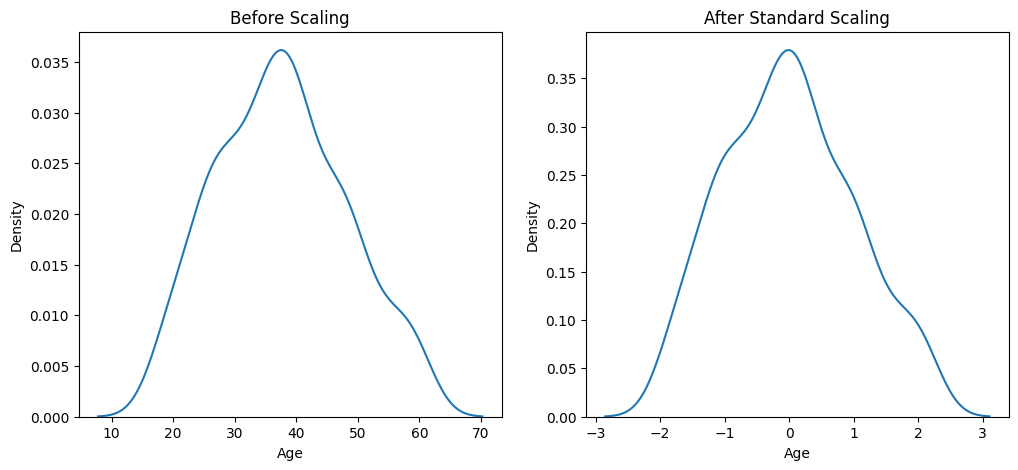

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train["Age"], ax=ax1)
# sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
sns.kdeplot(X_train_scaled["Age"], ax=ax2)
# sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()

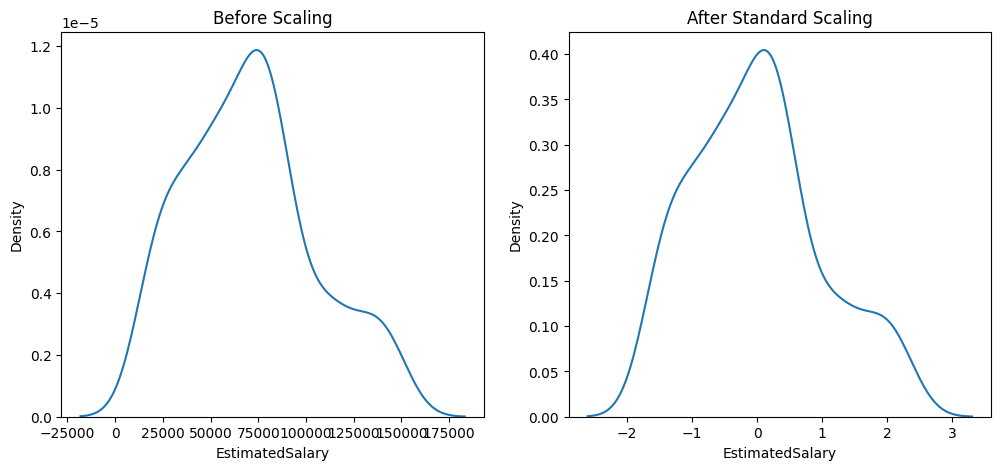

In [45]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
# sns.kdeplot(X_train["Age"], ax=ax1)
sns.kdeplot(X_train["EstimatedSalary"], ax=ax1)

ax2.set_title("After Standard Scaling")
# sns.kdeplot(X_train_scaled["Age"], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)

plt.show()